<a href="https://colab.research.google.com/github/byungkim0068/Benz-Model/blob/main/RC_Circuits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Charging Capacitor (timescale in units of RC)
$\frac{{dV}_C}{d t} = {V - V_C} $

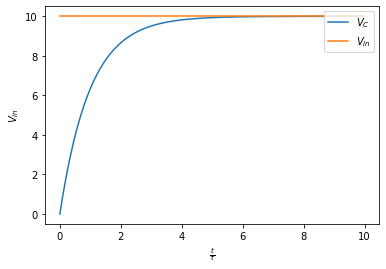

In [ ]:
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np

T=10
N=1000
dt=T/N
V=10

Vc_points=[]
t_points=np.arange(N)*dt
V_points=np.empty(N); V_points[:]=V
Vc=0.0

#Eulerian solver
for i in np.arange(N):
    Vc_points.append(Vc)
    Vc+=(V-Vc)*dt

plt.plot(t_points,Vc_points,'-',label=r"$V_C$")
plt.xlabel(r"$\frac{t}{\tau}$")
plt.ylabel(r"$V_C$")
plt.legend(loc='upper left')
#plt.twinx()
plt.plot(t_points,V_points,'-',label=r"$V_{in}$")
plt.ylabel(r"$V_{in}$")
plt.legend(loc='upper right')
plt.show()

### AC Voltage divider
$V_{in}=10 \sin \left(\frac{t}{RC}\right)$

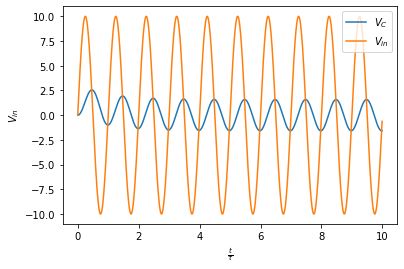

In [ ]:
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np

T=10
N=1000
dt=T/N

Vc_points=[]
t_points=np.arange(N)*dt
Vc=0.0
V=10*np.sin(2 * np.pi * t_points)

#Eulerian solver
for i in np.arange(N):
    Vc_points.append(Vc)
    Vc+=(V[i]-Vc)*dt

plt.plot(t_points,Vc_points,'-',label=r"$V_C$")
plt.xlabel(r"$\frac{t}{\tau}$")
plt.ylabel(r"$V_C$")
plt.legend(loc='upper left')
#plt.twinx()
plt.plot(t_points,V,'-',label=r"$V_{in}$")
plt.ylabel(r"$V_{in}$")
plt.legend(loc='upper right')
plt.show()

### DC Solution using Gillespie's algorithm
$\frac{{dV}_C}{d t} = {V - V_C} $

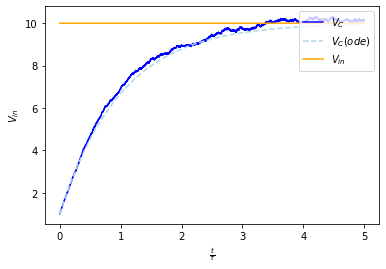

In [ ]:
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import math, random

T=5
dt=0.001
N=np.fix(T/dt)
V0=10

t_points=np.arange(N)*dt
V=V0#*(1+np.sin(2 * np.pi * t_points))
Vc_ode=1
Vc_points_ode=[]

#Eulerian solver
for i in np.arange(N):
    Vc_points_ode.append(Vc_ode)
    Vc_ode+=(V0-Vc_ode)*dt

Vc_points=[]
t_points=[]#np.arange(N)*dt
V=[]#V0*np.sin(2 * np.pi * t_points)
Vc=1
i=0
t=0

# Main loop Gillespie Simulation
#for t in tpoints:
while i < N:
    i=i+1

    #if Vc == 0:
    #    break

    w1 = V0#+np.abs(V0*np.sin(2 * np.pi * t))#V[i]
    w2 = np.abs(Vc)
    W = w1 + w2

    #dt = -math.log(random.uniform(0.0, 1.0)) / W
    #dt = h
    t = t + dt

    r=random.uniform(0.0, 1.0)
    if  r < (w1/W):
        Vc = Vc + V0*dt #* np.sign(V0-Vc)
    elif (w1/W <= r < (w1+w2)/W):
        Vc = Vc - Vc*dt #* np.sign(V0-Vc)
    Vc_points.append(Vc)
    V.append(V0)#+V0*np.sin(2 * np.pi * t))
    t_points.append(t)

plt.plot(t_points,Vc_points,'-',label=r"$V_C$",color='blue')
plt.plot(t_points,Vc_points_ode,'--',label=r"$V_C(ode)$",color='lightblue')
plt.xlabel(r"$\frac{t}{\tau}$")
plt.ylabel(r"$V_C$")
plt.legend(loc='upper left')
#plt.twinx()
plt.plot(t_points,V,'-',label=r"$V_{in}$",color='orange')
plt.ylabel(r"$V_{in}$")
plt.legend(loc='upper right')
plt.show()

### AC Solution using Gillespie's algorithm
$\frac{{dV}_C}{d t} = {V - V_C} $

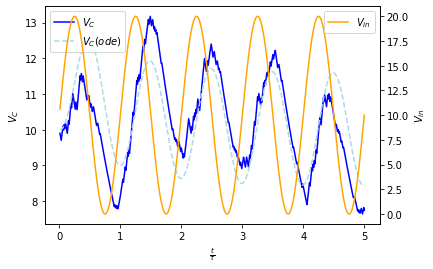

In [ ]:
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import math, random

T=5
dt=0.01
N=np.fix(T/dt)
V0=10

t_points=np.arange(N)*dt
V=V0*(1+np.sin(2 * np.pi * t_points))
Vc_ode=10
Vc_points_ode=[]

#Eulerian solver
for i in np.arange(N):
    Vc_points_ode.append(Vc_ode)
    Vc_ode+=(V[int(i)]-Vc_ode)*dt

Vc_points=[]
t_points=[]#np.arange(N)*dt
V=[]#V0*np.sin(2 * np.pi * t_points)
V0=10
Vc=10
i=0
t=0


# Main loop Gillespie Simulation
#for t in tpoints:
while i < N:
    i=i+1

    #if Vc == 0:
    #    break

    w1 = np.abs(V0*(1+np.sin(2 * np.pi * t)))#V[i]
    w2 = np.abs(Vc)
    W = w1 + w2

    #dt = -math.log(random.uniform(0.0, 1.0)) / W
    #dt = h
    t = t + dt

    r=random.uniform(0.0, 1.0)
    if  r < (w1/W):
        Vc = Vc + V0*(1+np.sin(2 * np.pi * t))*dt #* np.sign(V0-Vc)
    elif (w1/W <= r < (w1+w2)/W):
        Vc = Vc - Vc*dt #* np.sign(V0-Vc)
    Vc_points.append(Vc)
    V.append(V0*(1+np.sin(2 * np.pi * t)))
    t_points.append(t)

plt.plot(t_points,Vc_points,'-',label=r"$V_C$",color='blue')
plt.plot(t_points,Vc_points_ode,'--',label=r"$V_C(ode)$",color='lightblue')
plt.xlabel(r"$\frac{t}{\tau}$")
plt.ylabel(r"$V_C$")
plt.legend(loc='upper left')
plt.twinx()
plt.plot(t_points,V,'-',label=r"$V_{in}$",color='orange')
plt.ylabel(r"$V_{in}$")
plt.legend(loc='upper right')
plt.show()

### DC Solution using Gillespie's algorithm (Analysis of Variance)
$\frac{{dV}_C}{d t} = {V - V_C} $

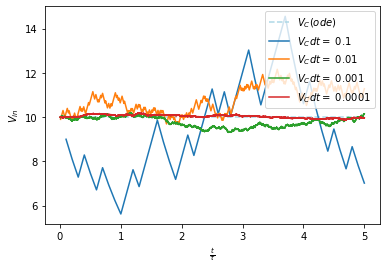

Text(0, 0.5, '$\\frac{\\sigma^2_{V}}{V^2}$')

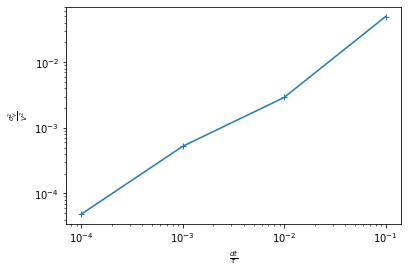

In [ ]:
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import math, random

V0=10
T=5
dt=0.1

def euler(V0,T,dt):
    N=np.fix(T/dt)
    t=0
    t_points=[]
    V=V0
    Vc_ode=10
    Vc_points_ode=[]

    #Eulerian solver
    for i in np.arange(N):
        t_points.append(t)
        Vc_points_ode.append(Vc_ode)
        t+=dt
        V=V0#*(1+np.sin(2 * np.pi * t))
        Vc_ode+=(V-Vc_ode)*dt

    return [t_points,Vc_points_ode]

def gillespie(V0,T,dt):
    N=np.fix(T/dt)
    Vc_points=[]
    t_points=[]#np.arange(N)*dt
    V=[]#V0*np.sin(2 * np.pi * t_points)
    Vc=10
    i=0
    t=0

    # Main loop Gillespie Simulation
    #for t in tpoints:
    while i < N:
        i=i+1

        #if Vc == 0:
        #    break

        w1 = V0#*np.abs(1+np.sin(2 * np.pi * t))#V[i]
        w2 = np.abs(Vc)
        W = w1 + w2

        #dt = -math.log(random.uniform(0.0, 1.0)) / W
        #dt = h
        t = t + dt

        r=random.uniform(0.0, 1.0)
        if  r < (w1/W):
            Vc = Vc + V0*dt#*(1+np.sin(2 * np.pi * t)) #* np.sign(V0-Vc)
        elif (w1/W <= r < (w1+w2)/W):
            Vc = Vc - Vc*dt #* np.sign(V0-Vc)
        Vc_points.append(Vc)
        V.append(V0*(1+np.sin(2 * np.pi * t)))
        t_points.append(t)

    return [t_points,Vc_points]

#dt=0.1
[t_points,Vc_points_ode]=euler(V0,T,dt)
plt.plot(t_points,Vc_points_ode,'--',label=r"$V_C(ode)$",color='lightblue')

varV=[]
for dt in [0.1,0.01,0.001,0.0001]:
    [t_points,Vc_points]=gillespie(V0,T,dt)
    plt.plot(t_points,Vc_points,'-',label=r"$V_C dt=$ "+'{}'.format(dt))
    varV.append(np.var(Vc_points)/np.average(Vc_points)**2)

plt.xlabel(r"$\frac{t}{\tau}$")
plt.ylabel(r"$V_C$")
plt.legend(loc='upper left')
#plt.twinx()
#V=[]
#for t in t_points: V.append(V0+V0*np.sin(2 * np.pi * t))
#plt.plot(t_points,V,'-',label=r"$V_{in}$",color='orange')
#plt.plot(t_points,[V0] * len(t_points),'-',label=r"$V_{in}$",color='orange')

plt.ylabel(r"$V_{in}$")
plt.legend(loc='upper right')
plt.show()

plt.loglog([0.1,0.01,0.001,0.0001],varV,'+-')
plt.xlabel(r"$\frac{dt}{\tau}$")
plt.ylabel(r"$\frac{\sigma^2_{V}}{V^2}$")


### AC Solution using Gillespie's algorithm (Analysis of Variance)
$\frac{{dV}_C}{d t} = {V - V_C} $

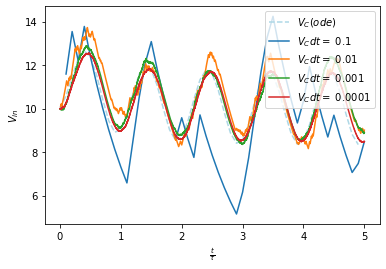

Text(0, 0.5, '$\\frac{\\sigma^2_{V}}{V^2}$')

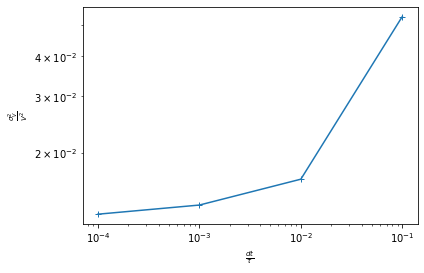

In [ ]:
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import math, random

V0=10
T=5
dt=0.1

def euler(V0,T,dt):
    N=np.fix(T/dt)
    t=0
    t_points=[]
    V=V0
    Vc_ode=10
    Vc_points_ode=[]

    #Eulerian solver
    for i in np.arange(N):
        t_points.append(t)
        Vc_points_ode.append(Vc_ode)
        t+=dt
        V=V0*(1+np.sin(2 * np.pi * t))
        Vc_ode+=(V-Vc_ode)*dt

    return [t_points,Vc_points_ode]

def gillespie(V0,T,dt):
    N=np.fix(T/dt)
    Vc_points=[]
    t_points=[]#np.arange(N)*dt
    V=[]#V0*np.sin(2 * np.pi * t_points)
    Vc=10
    i=0
    t=0

    # Main loop Gillespie Simulation
    #for t in tpoints:
    while i < N:
        i=i+1

        #if Vc == 0:
        #    break

        w1 = V0*np.abs(1+np.sin(2 * np.pi * t))#V[i]
        w2 = np.abs(Vc)
        W = w1 + w2

        #dt = -math.log(random.uniform(0.0, 1.0)) / W
        #dt = h
        t = t + dt

        r=random.uniform(0.0, 1.0)
        if  r < (w1/W):
            Vc = Vc + V0*(1+np.sin(2 * np.pi * t))*dt#* np.sign(V0-Vc)
        elif (w1/W <= r < (w1+w2)/W):
            Vc = Vc - Vc*dt #* np.sign(V0-Vc)
        Vc_points.append(Vc)
        V.append(V0*(1+np.sin(2 * np.pi * t)*dt))
        t_points.append(t)

    return [t_points,Vc_points]

#dt=0.1
[t_points,Vc_points_ode]=euler(V0,T,dt)
plt.plot(t_points,Vc_points_ode,'--',label=r"$V_C(ode)$",color='lightblue')

varV=[]
for dt in [0.1,0.01,0.001,0.0001]:
    [t_points,Vc_points]=gillespie(V0,T,dt)
    plt.plot(t_points,Vc_points,'-',label=r"$V_C dt=$ "+'{}'.format(dt))
    varV.append(np.var(Vc_points)/np.average(Vc_points)**2)

plt.xlabel(r"$\frac{t}{\tau}$")
plt.ylabel(r"$V_C$")
plt.legend(loc='upper left')
#plt.twinx()
#V=[]
#for t in t_points: V.append(V0+V0*np.sin(2 * np.pi * t))
#plt.plot(t_points,V,'-',label=r"$V_{in}$",color='orange')
#plt.plot(t_points,[V0] * len(t_points),'-',label=r"$V_{in}$",color='orange')

plt.ylabel(r"$V_{in}$")
plt.legend(loc='upper right')
plt.show()

plt.loglog([0.1,0.01,0.001,0.0001],varV,'+-')
plt.xlabel(r"$\frac{dt}{\tau}$")
plt.ylabel(r"$\frac{\sigma^2_{V}}{V^2}$")
